# Figure 3: iModulon Examples

## Setup

In [1]:
from os import path
import seaborn as sns
import matplotlib.pyplot as plt

from pymodulon.io import load_json_model
from pymodulon.plotting import *

### Set plotting style

In [2]:
sns.set_style('ticks')
plt.style.use('custom.mplstyle')

# To save plots, set save_plot=True
save_plot=False

### Load data

In [3]:
figure_dir = 'raw_figures'
data_dir = path.join('..','data','processed_data')

In [4]:
data_file = path.join(data_dir,'bsu.json.gz')
ica_data = load_json_model(data_file)

# Panel A: Early Biofilm iModulon

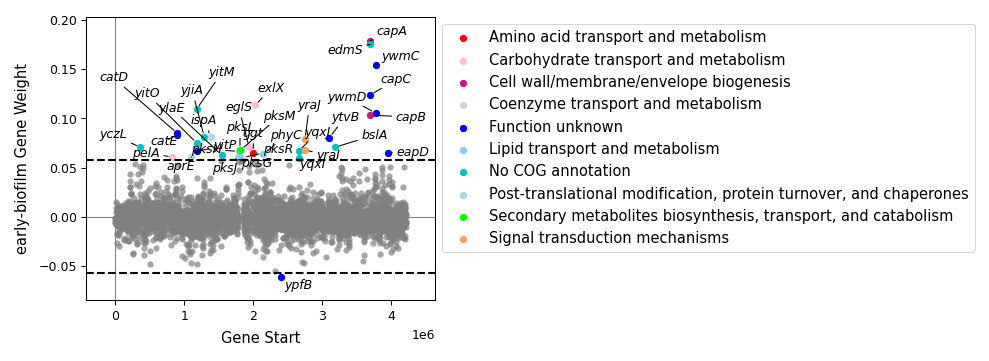

In [5]:
plot_gene_weights(ica_data,'early-biofilm',show_labels=True,label_font_kwargs={'fontsize':6})
if save_plot:
    plt.savefig(path.join('raw_figures','Fig3a_biofilm_genes.pdf'))

# Panel B: Biofilm iModulon activities

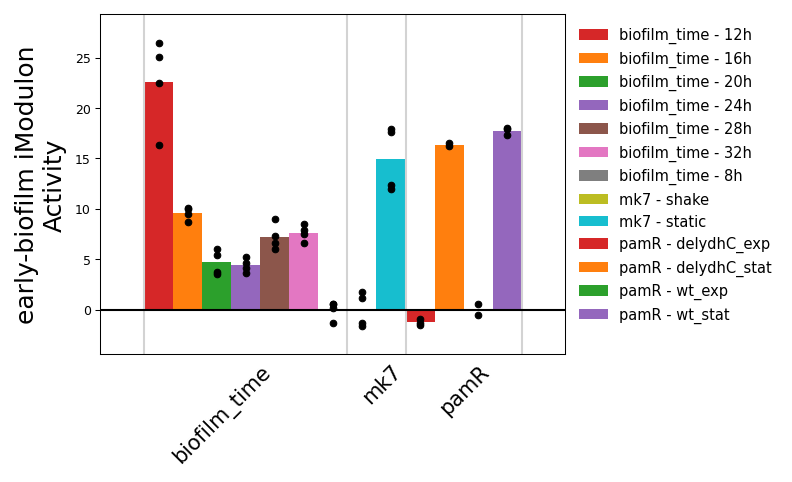

In [6]:
fig,ax = plt.subplots(figsize=(4,3))
plot_activities(ica_data,'early-biofilm',
                ax=ax,
                projects=['biofilm_time','mk7','pamR'],
                highlight=['biofilm_time','mk7','pamR'],
                legend_kwargs={'ncol':1,'frameon':False})
if save_plot:
    plt.savefig(path.join('raw_figures','Fig3b_biofilm_activities.pdf'))

# Panel C: SP-beta iModulons

In [7]:
spb1 = set(ica_data.view_imodulon('SPbeta-1').index)
spb2 = set(ica_data.view_imodulon('SPbeta-2').index)
yono = set(ica_data.view_imodulon('YonO-1').index)

In [8]:
from matplotlib_venn import venn3

In [9]:
spb = set(ica_data.gene_table.loc['BSU_19820':'BSU_21660'].index)

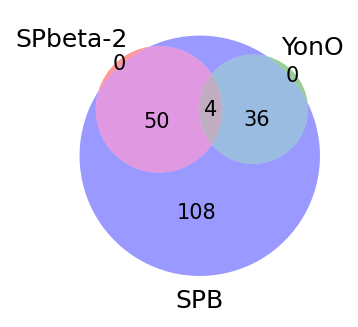

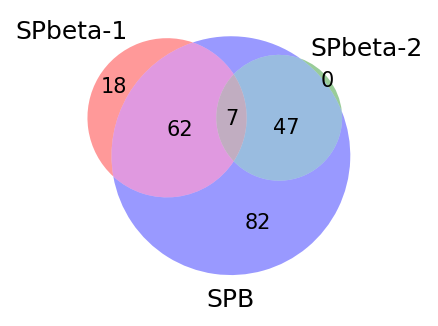

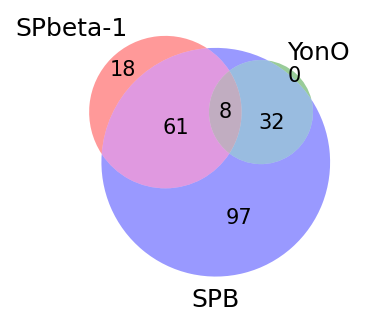

In [10]:
venn3((spb2,yono,spb),set_labels=('SPbeta-2','YonO','SPB'))
plt.figure()
venn3((spb1,spb2,spb),set_labels=('SPbeta-1','SPbeta-2','SPB'))
plt.figure()
venn3((spb1,yono,spb),set_labels=('SPbeta-1','YonO','SPB'))

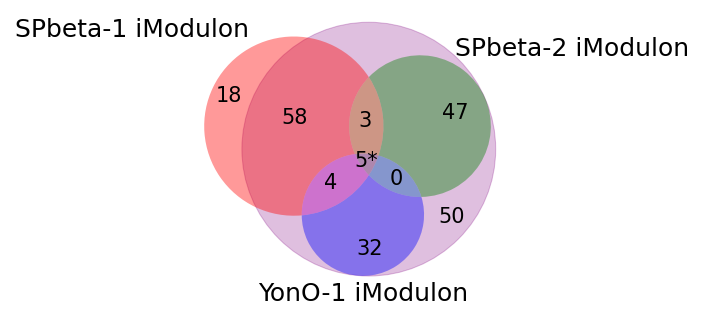

In [11]:
fig, ax = plt.subplots()
venn = venn3((spb1,spb2,yono),set_labels=('SPbeta-1 iModulon','SPbeta-2 iModulon','YonO-1 iModulon'))

# Remove SPbeta-1 text
venn.subset_labels[0].set_text('')

# Add star to center
venn.subset_labels[-1].set_text('5*')

# Add SPbeta circle
circle = plt.Circle((0.1,-0.015),.58,color='purple',zorder=0,alpha=0.25)
ax.add_patch(circle)

# Add SPbeta-1 texts
ax.text(-0.6,0.2,str(len(spb1-spb-spb2-yono)))
ax.text(-0.3,0.1,str(len((spb1&spb)-spb2-yono)))
ax.text(0.42,-0.35,str(len(spb-spb1-spb2-yono)))

if save_plot:
    plt.savefig(path.join('raw_figures','Fig3c_spbeta_genes.pdf'))

In [12]:
spb1 & spb2 & yono - spb

{'BSU_18909'}

# Panel D,E: SPbeta iModulon activities

In [12]:
groups = {}
for i,row in ica_data.sample_table.iterrows():
    if row.condition == 'wt_53C':
        groups[i] = 'Heatshock (53C)'
    elif row.condition in ['delyonO','delyonO_mmc']:
        groups[i] = 'YonO Mutant'
    elif row.strain_description == 'BEST7003 with phi3T':
        groups[i] = 'Phi3T Infection'
    elif row.strain_description == 'BEST7003 with spBeta':
        groups[i] = 'spBeta Infection'

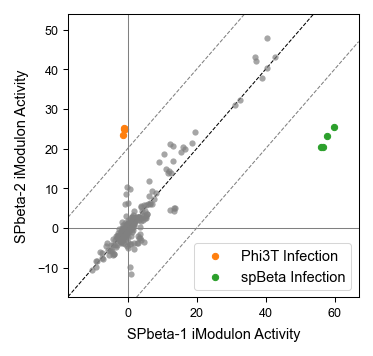

In [13]:
fig,ax = plt.subplots(figsize=(2.5,2.5))
compare_activities(ica_data,'SPbeta-1','SPbeta-2',
                   ax=ax,
                   line45=True,
                   fit_metric=None,
                   line45_margin=20,
                   groups=groups,
                   colors=['tab:green','tab:orange'])
if save_plot:
    plt.savefig(path.join('raw_figures','Fig3d_spbeta_activities.pdf'))

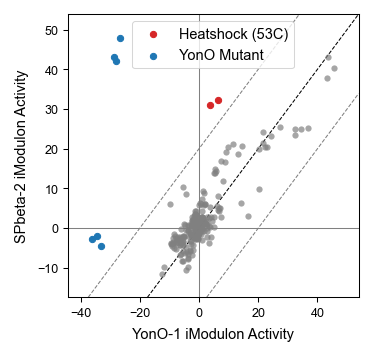

In [14]:
fig,ax = plt.subplots(figsize=(2.5,2.5))
compare_activities(ica_data,'YonO-1','SPbeta-2',
                   ax=ax,
                   line45=True,
                   fit_metric=None,
                   line45_margin=20, 
                   groups=groups,
                   colors=['tab:red','tab:blue'])
if save_plot:
    plt.savefig(path.join('raw_figures','Fig3e_spbeta_yonO_activities.pdf'))